In [2]:
import tensorflow as tf
from tensorflow  import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
from random import *
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report, confusion_matrix

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [4]:
object = {
  0: "airplane",
  1: "automobile",
  2: "bird",
  3: "cat",
  4: "deer",
  5: "dog",
  6: "frog",
  7: "horse",
  8: "ship",
  9: "truck"
}

In [5]:
print("x_train",x_train.shape)
print("y_train",y_train.shape)
print("x_test",x_test.shape)
print("y_test",y_test.shape)

x_train (50000, 32, 32, 3)
y_train (50000, 1)
x_test (10000, 32, 32, 3)
y_test (10000, 1)


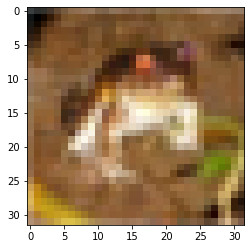

In [6]:
plt.imshow(x_train[0])

In [7]:
# Lets store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

# Getting our data in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our data thereby changing our
# Our original image shape of (50000,28,28) to (50000,28,28,3)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)

# store the shape of a single image 
input_shape = (img_rows, img_cols, 3)

# change our image type to float32 data type
x_train = x_train.astype('float32') #uint8 originally
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255.0
x_test /= 255.0

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [8]:
from tensorflow.keras.utils import to_categorical

# Now we one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Let's count the number columns in our hot encoded matrix 
print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]

Number of Classes: 10


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD 

# create model
model = Sequential()

# Our First Convolution Layer, Filter size 32 which reduces our layer size to 32 x 32 x 32
# We use ReLU activation and specify our input_shape which is 32 x 32 x 3
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding="same", input_shape=input_shape))

# Our Second Convolution Layer, Filter size 64 which reduces our layer size to 30 x 30 x 32
model.add(Conv2D(32, (3, 3), activation='relu'))

# We use MaxPooling with a kernel size of 2 x 2, this reduces our size to 15 x 15 x 32
model.add(MaxPooling2D(pool_size=(2, 2)))

# We use a dropout P setting of 0.25 to reduce overfitting
model.add(Dropout(0.25))

# Our Tird Convolution Layer, Filter size 64 which reduces our layer size to 15 x 15 x 64
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding="same"))

# Our Second Convolution Layer, Filter size 64 which reduces our layer size to 13 x 13 x 64
model.add(Conv2D(64, (3, 3), activation='relu'))

# We use MaxPooling with a kernel size of 2 x 2, this reduces our size to 6 x 6 x 64
model.add(MaxPooling2D(pool_size=(2, 2)))

# We use a dropout P setting of 0.25 to reduce overfitting
model.add(Dropout(0.25))

# We then Flatten our tensor object before input into our Dense Layer
# A flatten operation on a tensor reshapes the tensor to have the shape that is 
# equal to the number of elements contained in tensor
# In our CNN it goes from 6 * 6 * 64 to 2304 * 1
model.add(Flatten())

# We connect this layer to a Fully Connected/Dense layer of size 1 * 512
model.add(Dense(512, activation='relu'))

# We use another Dropout layer
model.add(Dropout(0.5))

# We create our final Fully Connected/Dense layer with an output for each class (10)
model.add(Dense(num_classes, activation='softmax'))

# We compile our model, this creates an object that stores the model we just created
# We set our Optimizer to use Stochastic Gradient Descent (learning rate of 0.01)
# We set our loss function to be categorical_crossentropy as it's suitable for multiclass problems
# Finally, the metrics (What we judge our performance on) to be accuracy
model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.01),
              metrics = ['accuracy'])

# We can use the summary function to display our model layers and parameters
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

In [12]:
batch_size = 32
epochs = 10

# Store our results here so we can plot later
# In our fit function we specify our datsets (x_train & y_train), 
# the batch size (typically 16 to 128 depending on your RAM), the number of 
# epochs (usually 10 to 100) and our validation datasets (x_test & y_test)
# verbose = 1, sets our training to output performance metrics every epoch
history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))

# We obtain our accuracy score using the evalute function
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
1563/1563 [==============================] - 157s 100ms/step - loss: 2.0812 - accuracy: 0.2271 - val_loss: 1.7964 - val_accuracy: 0.3664
Epoch 2/10
1563/1563 [==============================] - 155s 99ms/step - loss: 1.7624 - accuracy: 0.3592 - val_loss: 1.6151 - val_accuracy: 0.4258
Epoch 3/10
1563/1563 [==============================] - 158s 101ms/step - loss: 1.6050 - accuracy: 0.4144 - val_loss: 1.4553 - val_accuracy: 0.4679
Epoch 4/10
1563/1563 [==============================] - 152s 97ms/step - loss: 1.4769 - accuracy: 0.4601 - val_loss: 1.4016 - val_accuracy: 0.4860
Epoch 5/10
1563/1563 [==============================] - 148s 94ms/step - loss: 1.3936 - accuracy: 0.4967 - val_loss: 1.2803 - val_accuracy: 0.5436
Epoch 6/10
1563/1563 [==============================] - 154s 98ms/step - loss: 1.3255 - accuracy: 0.5230 - val_loss: 1.2214 - val_accuracy: 0.5690
Epoch 7/10
1563/1563 [==============================] - 178s 114ms/step - loss: 1.2667 - accuracy: 0.5470 - val_loss

In [22]:
prediction = model.predict(x_test)

pred = np.argmax(prediction, axis=1)

print(pred)

[3 8 8 ... 5 1 7]


Prediction is:  cat
True object is:  cat


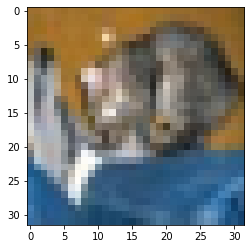

Prediction is:  ship
True object is:  ship


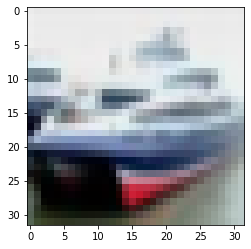

Prediction is:  ship
True object is:  ship


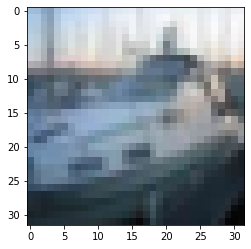

Prediction is:  ship
True object is:  airplane


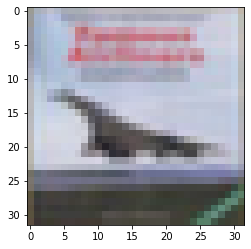

Prediction is:  deer
True object is:  frog


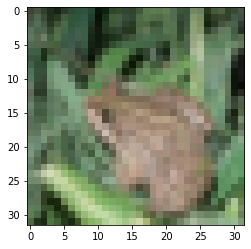

Prediction is:  frog
True object is:  frog


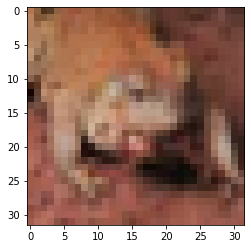

Prediction is:  automobile
True object is:  automobile


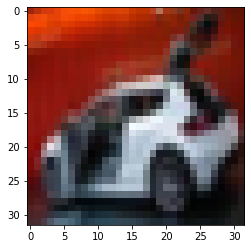

Prediction is:  frog
True object is:  frog


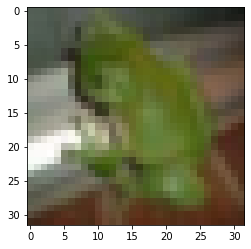

Prediction is:  cat
True object is:  cat


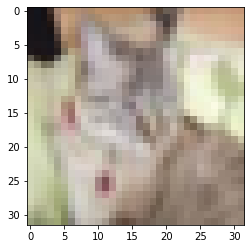

Prediction is:  automobile
True object is:  automobile


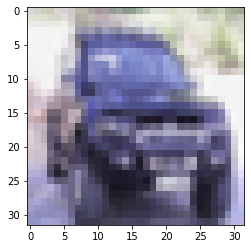

In [27]:
for i in range(10):
    print("Prediction is: ", object[pred[i]])
    print("True object is: ", object[np.argmax(y_test[i])])
    plt.imshow(x_test[i])
    plt.show()

Our model is just a little worse than us (humans).

In [23]:
from tensorflow.keras.applications import vgg16 as vgg
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

base_model = tf.keras.applications.VGG16(input_shape=(32, 32, 3), include_top=False, weights='imagenet')

# Creating dictionary that maps layer names to the layers
layer_dict = dict([(layer.name, layer) for layer in base_model.layers])

# use “get_layer” method to save the last layer of the network
last_layer = base_model.get_layer('block3_pool')
# save the output of the last layer to be the input of the next layer
last_output = last_layer.output

# Stacking a new simple convolutional network on top of it  
x = GlobalAveragePooling2D()(last_output)
x = BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)

# Creating new model. Please note that this is NOT a Sequential() model.
custom_model = Model(inputs=base_model.input, outputs=x)

# Make sure that the pre-trained bottom layers are not trainable
for layer in custom_model.layers[:11]:
    layer.trainable = False

# Do not forget to compile it
custom_model.compile(loss='categorical_crossentropy',
                     optimizer=optimizers.RMSprop(lr=1e-5),
                     metrics=['accuracy'])


In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_train)

In [25]:
batch_size_TL = 32
epochs_TL = 10

# Store our results here so we can plot later
# In our fit function we specify our datsets (x_train & y_train), 
# the batch size (typically 16 to 128 depending on your RAM), the number of 
# epochs (usually 10 to 100) and our validation datasets (x_test & y_test)
# verbose = 1, sets our training to output performance metrics every epoch
history_TL = custom_model.fit(x_train,
                    y_train,
                    batch_size = batch_size_TL,
                    epochs = epochs_TL,
                    verbose = 1,
                    validation_data = (x_test, y_test))

# We obtain our accuracy score using the evalute function
score_TF = custom_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_TF[0])
print('Test accuracy:', score_TF[1])


Epoch 1/10
1563/1563 [==============================] - 327s 209ms/step - loss: 2.2172 - accuracy: 0.2164 - val_loss: 1.7752 - val_accuracy: 0.4111
Epoch 2/10
1563/1563 [==============================] - 329s 211ms/step - loss: 1.8092 - accuracy: 0.3580 - val_loss: 1.5469 - val_accuracy: 0.4785
Epoch 3/10
1563/1563 [==============================] - 325s 208ms/step - loss: 1.6387 - accuracy: 0.4238 - val_loss: 1.4255 - val_accuracy: 0.5116
Epoch 4/10
1563/1563 [==============================] - 329s 211ms/step - loss: 1.5344 - accuracy: 0.4626 - val_loss: 1.3481 - val_accuracy: 0.5334
Epoch 5/10
1563/1563 [==============================] - 341s 218ms/step - loss: 1.4657 - accuracy: 0.4864 - val_loss: 1.2903 - val_accuracy: 0.5517
Epoch 6/10
1563/1563 [==============================] - 325s 208ms/step - loss: 1.4089 - accuracy: 0.5066 - val_loss: 1.2432 - val_accuracy: 0.5660
Epoch 7/10
1563/1563 [==============================] - 237s 151ms/step - loss: 1.3652 - accuracy: 0.5210 - val_